In [2]:
%pylab inline
import seaborn as sns
sns.set_context('talk')
col = sns.color_palette(n_colors=5)
import ipywidgets as widgets

Populating the interactive namespace from numpy and matplotlib


## Formen generieren

$$\mathbf{p}_{n,m}(t) = \begin{pmatrix}x(t)\\y(t)\end{pmatrix} = \begin{pmatrix}\cos(nt)\\\sin(mt)\end{pmatrix}$$

Grundformen: $\mathbf{p}_{1,1}(t), \mathbf{p}_{1,2}(t), \mathbf{p}_{2,3}(t)$ und $\mathbf{p}_{3,4}(t)$ an 16 Stützstellen $t_k = \frac{k}{8}\,\pi$ mit $k = 0,\ldots,16$

In [13]:
t = linspace(0,2*pi,16)
G = array([
    [cos(t), sin(t)],
    [cos(t), sin(2*t)],
    [cos(2*t), sin(3*t)],
    [cos(3*t), sin(4*t)],
])

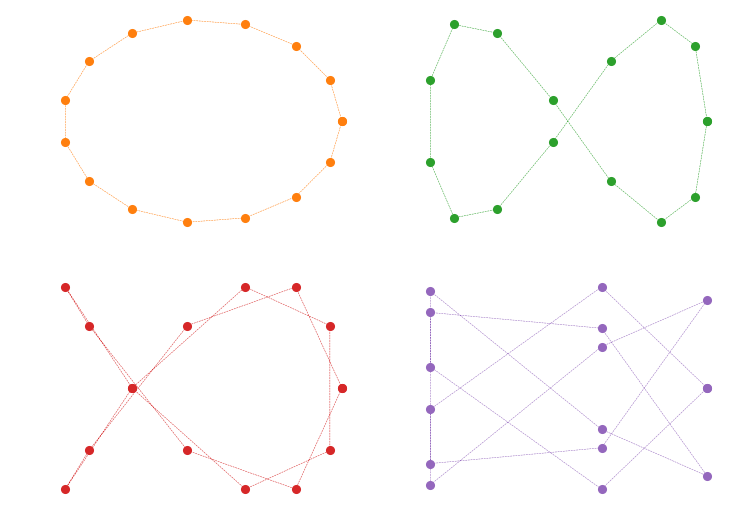

In [14]:
figure(figsize=(12,9))
for i,g in zip([1,2,3,4], G):
    subplot(2,2,i)
    plot(g[0], g[1], 'o--', lw=.5, color=col[i])
    axis('off')

In [ ]:
## Interpolation

$$\mathbf{p} = \alpha_1 p_{1,1} + \alpha_2 p_{1,2} + \alpha_3 p_{2,3} + \alpha_4 p_{3,4}$$

In [16]:
@widgets.interact(a1=(0,1,.01), a2=(0,1,.01), a3=(0,1,.01), a4=(0,1,.01))
def plot_contour(a1=.1, a2=0, a3=0, a4=0):
    figure(figsize=(8,8))
    for c,a,g in zip(col[1:], [a1,a2,a3,a4], G):
        plot(a*g[0], a*g[1], 'o--', alpha=.2, lw=.5, color=c)
        
    shape = np.dot(G.T, [a1,a2,a3,a4]).T
    spape = np.c_[shape, shape[:,0:1]] # ersten punkt doppelt einfügen => geschlossene kontur
    plot(shape[0], shape[1], 'o--', lw=.5, color=col[0])
    xlabel("x")
    axis("off")
    show()